In the following notebook, we will be exploring the data and trying to find some insights that will help us in the modeling phase.

### Import Libraries

In [1]:
# append the path of the parent directory
import sys
sys.path.append("..")

In [2]:
from etl.dataset import CustomFashionMNISTDataModule, LABEL_TO_CLASS

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2

## Data Loading

In [4]:
# Define data transformations
transform = A.Compose([
    ToTensorV2()
])

In [5]:
dm = CustomFashionMNISTDataModule(
    transform, transform,
    val_size=0.15, normalization="none"
)
dm.setup()
imgs, labels = next(iter(dm.train_dataloader()))
imgs.shape, labels.shape

(torch.Size([64, 1, 1, 28, 28]), torch.Size([64]))

----

## Data Visualization

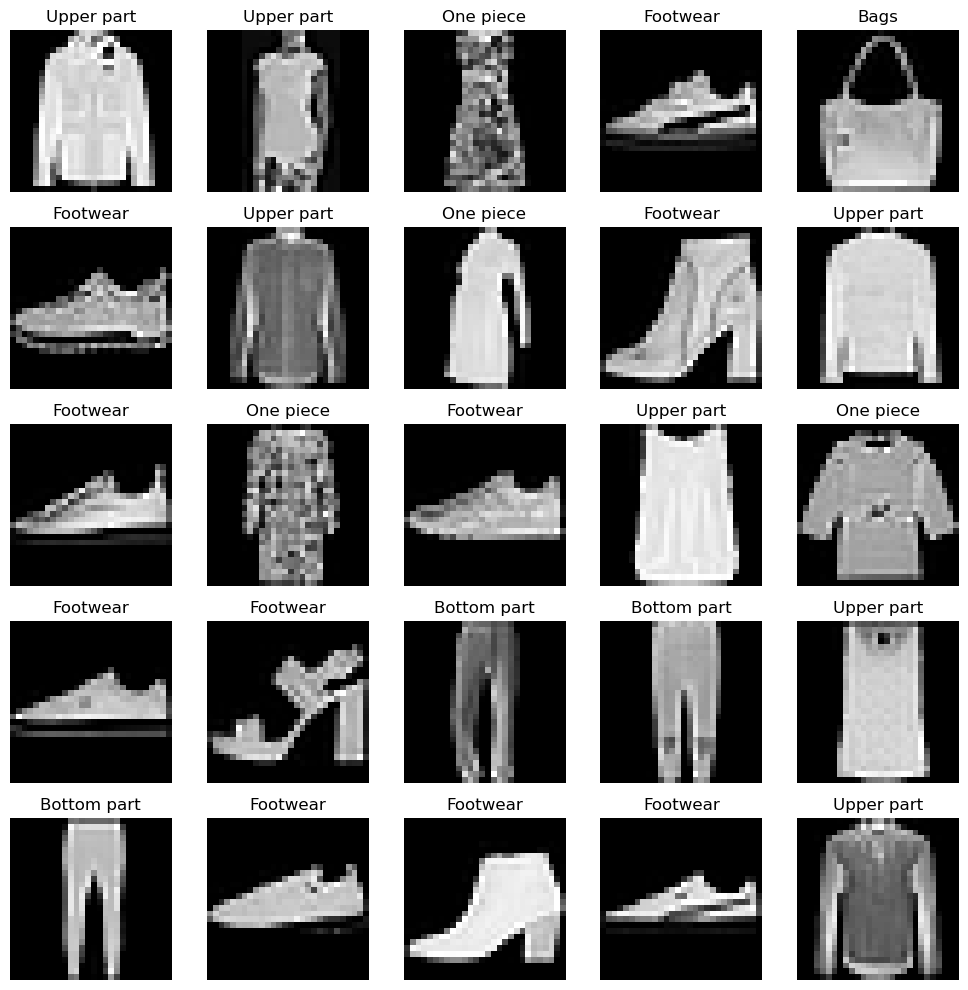

In [6]:
r, c = 5, 5
fig = plt.figure(figsize=(2*c, 2*r))
for _r in range(r):
    for _c in range(c):
        ix = _r*c + _c
        ax = plt.subplot(r, c, ix + 1)
        img, label = imgs[ix], labels[ix]
        ax.axis("off")
        ax.imshow(img.squeeze(), cmap="gray")
        ax.set_title(LABEL_TO_CLASS[label.item()])
plt.tight_layout()
plt.show()

----

## Data distribution

In [7]:
print(f"There are {len(dm.train_dataloader().dataset)} training samples")
print(f"There are {len(dm.val_dataloader().dataset)} validation samples")
print(f"There are {len(dm.test_dataloader().dataset)} test samples")

There are 51000 training samples
There are 9000 validation samples
There are 10000 test samples


In [8]:
train_labels = []
for _, labels in dm.train_dataloader():
    train_labels.extend(labels)

In [9]:
val_labels = []
for _, labels in dm.val_dataloader():
    val_labels.extend(labels)

In [10]:
test_labels = []
for _, labels in dm.test_dataloader():
    test_labels.extend(labels)

In [11]:
# Create a count plot using Seaborn
sns.set(style="whitegrid")  # Set the style of the plot (optional)

In [12]:
def labels_countplot(labels, label_to_class, title):
    plt.figure(figsize=(10, 5))  # Set the figure size (optional)
    ax = sns.countplot(  # Create the count plot
        x=labels,
        order=sorted(label_to_class.keys())
    )

    # Set x-axis tick labels using label_to_class mapping
    plt.xticks(
        range(len(label_to_class)),
        [label_to_class[val] for val in range(len(label_to_class))],
        rotation=0
    )

    # Add labels to the bars
    for p in ax.patches:
        ax.annotate(
            f'{int(p.get_height())}',  # Value to display
            (p.get_x() + p.get_width() / 2, p.get_height()),  # Position xy
            ha='center', va='bottom'
        )

    # Add labels and title
    plt.xlabel("Labels")
    plt.ylabel("Count")
    plt.title(title)

    # Show the plot
    plt.show()

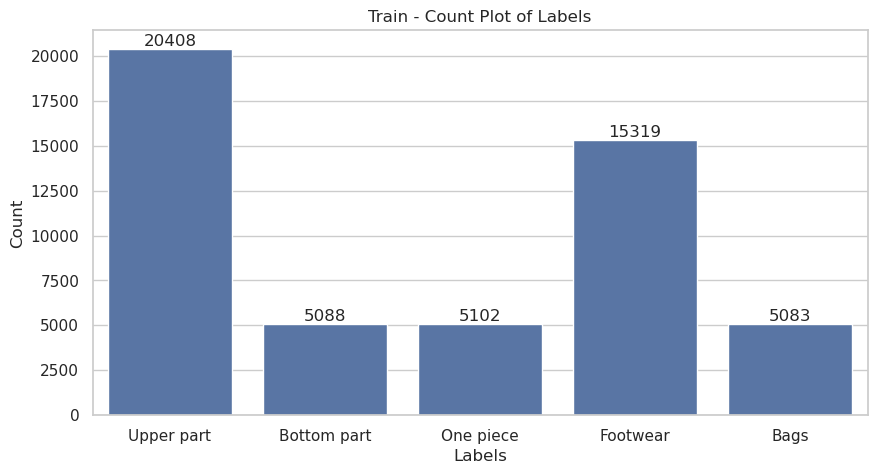

In [13]:
labels_countplot(train_labels, LABEL_TO_CLASS, "Train - Count Plot of Labels")

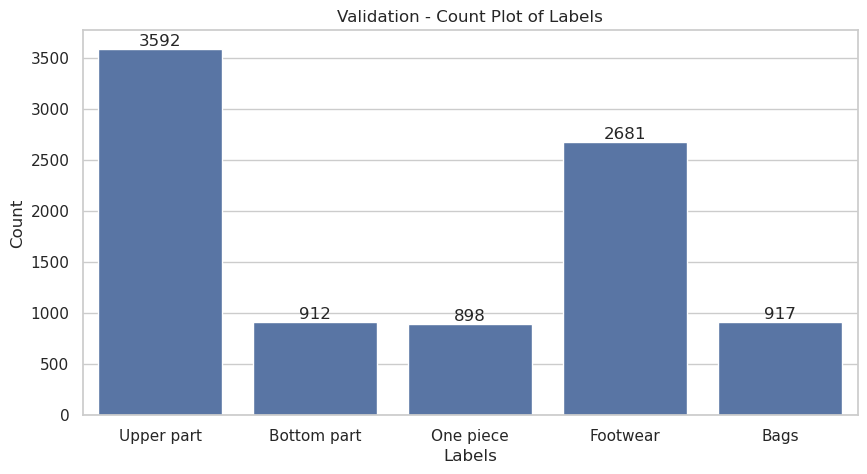

In [14]:
labels_countplot(val_labels, LABEL_TO_CLASS, "Validation - Count Plot of Labels")

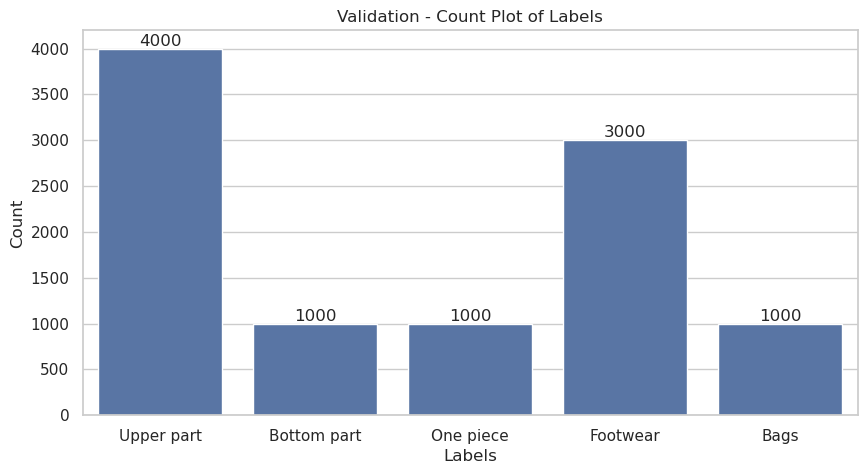

In [15]:
labels_countplot(test_labels, LABEL_TO_CLASS, "Validation - Count Plot of Labels")